<a href="https://colab.research.google.com/github/shauryasachdev/Deep-Learning/blob/main/Classification_Keras_Recap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow_cpu==2.19.0
!pip install matplotlib==3.9.2

print("=========== All Libraries are installed ===========")

=========== All Libraries are installed ===========


In [2]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [3]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.utils import to_categorical

In [4]:
import matplotlib.pyplot as plt

In [5]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
y_test.shape

(10000,)

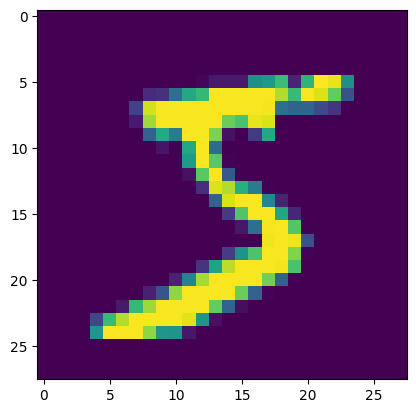

In [10]:
plt.imshow(X_train[0])

In [11]:
X_train.shape
print(X_train.shape[0])
print(X_train.shape[1])
print(X_train.shape[2])

60000
28
28


In [12]:
num_pixels = X_train.shape[1] * X_train.shape[2]
print(num_pixels)
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train.shape


784


(60000, 784)

In [13]:
X_train = X_train / 255
X_test = X_test / 255

In [14]:
X_train.shape

(60000, 784)

In [15]:
X_test.shape

(10000, 784)

In [16]:
y_train.shape

(60000,)

In [17]:
y_test.shape


(10000,)

In [18]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


Result in MNIST



































Before to_categoricalAfter to_categoricalMeaningy_train.shape → (60000,)(60000, 10)60,000 samples, each with 10 valuesy_train[0] → 5[0,0,0,0,0,1,0,0,0,0]"the digit is 5"y_train[1] → 0[1,0,0,0,0,0,0,0,0,0]"the digit is 0"y_test.shape → (10000,)(10000, 10)same for test setnum_classes → 10there are 10 possible digits
So after running this code:

print(num_classes)→ 10
y_train and y_test are now one-hot encoded matrices

Why do we do this in MNIST (and almost all classification tasks)?
Most neural networks with a softmax output layer + categorical crossentropy loss expect the target (y) to be:

not a single integer like 7
but a probability-like vector of length = number of classes

Example:
Python# Model output (predicted probabilities)
prediction = [0.01, 0.02, 0.00, 0.00, 0.00, 0.95, 0.01, 0.00, 0.00, 0.01]   # highest value at index 5

# Target (after to_categorical)
true_label = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]                               # 1 at index 5
Categorical crossentropy compares these two vectors very naturally.
Quick summary – what this code really does in MNIST

























LineWhat it changesTypical MNIST resulty_train = to_categorical(y_train)integers 0–9 → one-hot vectors (10 cols)shape goes (60000,) → (60000, 10)y_test  = to_categorical(y_test)same for test set(10000,) → (10000, 10)num_classes = y_test.shape[1]reads number of columnsnum_classes = 10
So in short:
This code prepares the labels so they are in the correct format for training a neural network to classify the 10 handwritten digits (0–9) using categorical cross-entropy loss.
Without this step, you would usually get an error when trying to train the model with loss='categorical_crossentropy'.


In [19]:
def classification_model():

  model = Sequential()
  model.add(Input(shape=(num_pixels,)))
  model.add(Dense(num_pixels, activation='relu'))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [20]:
model = classification_model()

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

scores = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.9048 - loss: 0.3144 - val_accuracy: 0.9668 - val_loss: 0.1081
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 12ms/step - accuracy: 0.9749 - loss: 0.0797 - val_accuracy: 0.9755 - val_loss: 0.0820
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9824 - loss: 0.0524 - val_accuracy: 0.9746 - val_loss: 0.0817
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9887 - loss: 0.0375 - val_accuracy: 0.9776 - val_loss: 0.0797
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9906 - loss: 0.0280 - val_accuracy: 0.9770 - val_loss: 0.0859
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9930 - loss: 0.0218 - val_accuracy: 0.9767 - val_loss: 0.0909
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9926 - loss: 0.0229 - val_accuracy: 0.9766 - val_loss: 0.0995
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.9933 -

In [23]:
print('Accuracy: {}% \n Error: {}%' .format(scores[1], 1 - scores[1]))

Accuracy: 0.9832000136375427% 
 Error: 0.016799986362457275%


In [24]:
model.save('Classification_model.keras')

In [25]:
pretrained_model = keras.saving.load_model('Classification_model.keras')

In [37]:
pretrained_model = keras.saving.load_model('Classification_model.keras')
print("Pre-trained model loaded successfully")

pretrained_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)
scores_20_epochs = pretrained_model.evaluate(X_test, y_test, verbose = 0)
print('Accuracy_10_epochs: {}% \n Accuracy_20_epochs: {}'.format(scores[1], scores_20_epochs[1]))

Pre-trained model loaded successfully
Epoch 1/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9955 - loss: 0.0144 - val_accuracy: 0.9845 - val_loss: 0.0715
Epoch 2/10
1875/1875 - 20s - 10ms/step - accuracy: 0.9961 - loss: 0.0126 - val_accuracy: 0.9823 - val_loss: 0.0859
Epoch 3/10
1875/1875 - 20s - 11ms/step - accuracy: 0.9957 - loss: 0.0133 - val_accuracy: 0.9830 - val_loss: 0.0915
Epoch 4/10
1875/1875 - 20s - 11ms/step - accuracy: 0.9965 - loss: 0.0126 - val_accuracy: 0.9828 - val_loss: 0.0866
Epoch 5/10
1875/1875 - 19s - 10ms/step - accuracy: 0.9962 - loss: 0.0131 - val_accuracy: 0.9806 - val_loss: 0.1101
Epoch 6/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9969 - loss: 0.0108 - val_accuracy: 0.9826 - val_loss: 0.1111
Epoch 7/10
1875/1875 - 19s - 10ms/step - accuracy: 0.9972 - loss: 0.0098 - val_accuracy: 0.9828 - val_loss: 0.0936
Epoch 8/10
1875/1875 - 20s - 11ms/step - accuracy: 0.9970 - loss: 0.0111 - val_accuracy: 0.9782 - val_loss: 0.1331
Epoch 9/10
1875/1875 - 19s - 10ms/step - a